# **Question 1**

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                 

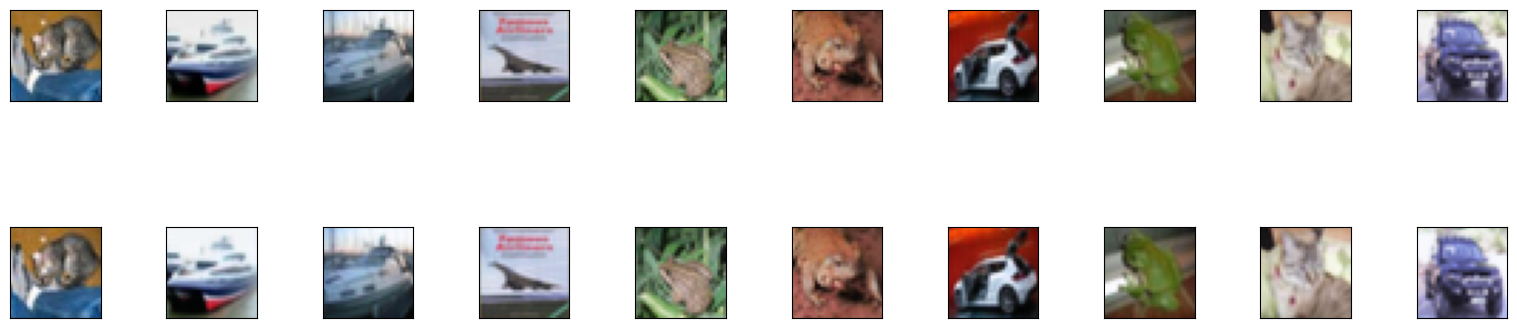

In [ ]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)
print(X_train.shape)
print(X_test.shape)



input_img = Input(shape=(32,32,3))

#Encoder
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

#Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')




model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())     # 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32
model.add(BatchNormalization())     # 16x16x32
model.add(UpSampling2D())
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3
model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()




autoencoder=Model(input_img, decoded)


autoencoder.summary()


encoder = Model(input_img, encoded)

encoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



model.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))



#encoded_imgs = model.predict(X_test)
predicted = model.predict(X_test)


plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()




# **Question 2**
(64,32,16) for encoder part and (16,32,64) for decoder

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 batch_normalization_4 (Bat  (None, 16, 16, 16)        64        
 chNormalization)                                                
                                                                 
 up_sampling2d_7

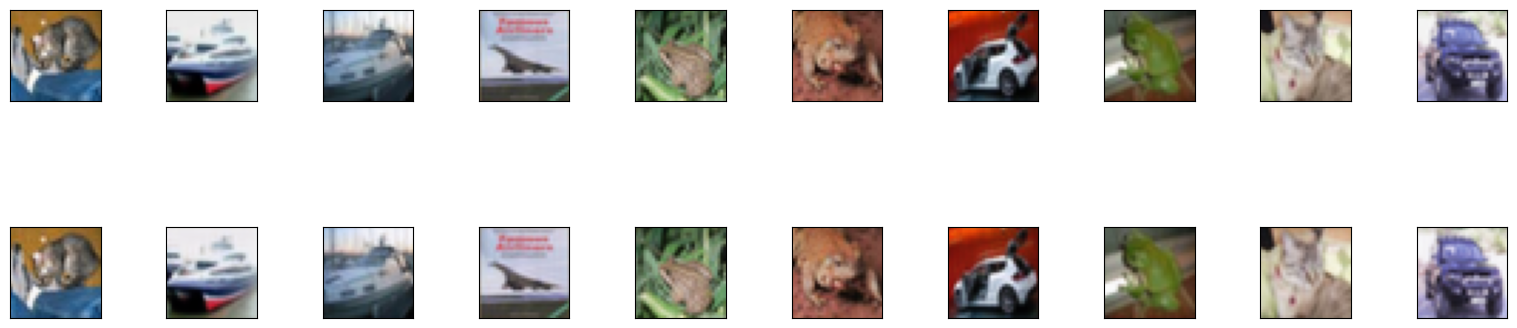

In [ ]:
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.models import Model, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 3)
X_test = X_test.reshape(len(X_test), X_test.shape[1], X_test.shape[2], 3)
print(X_train.shape)
print(X_test.shape)

input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

model = Sequential()

model.add(Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())  # 32x32x64
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))  # 16x16x32
model.add(Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu'))  # 16x16x16
model.add(BatchNormalization())  # 16x16x16
model.add(UpSampling2D())
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))  # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3, kernel_size=1, strides=1, padding='same', activation='sigmoid'))  # 32x32x3
model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

autoencoder = Model(input_img, decoded)

autoencoder.summary()

encoder = Model(input_img, encoded)

encoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, X_train,
          epochs=50,
          batch_size=256,
          shuffle=True,
          validation_data=(X_test, X_test))

# encoded_imgs = model.predict(X_test)
predicted = model.predict(X_test)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstructed images
    ax = plt.subplot(3, 20, 2 * 20 + i + 1)
    plt.imshow(predicted[i].reshape(32, 32, 3))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


# **Question 3**

Encoder to (32, 16, 8)
Decoder to (8, 16, 32)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 8)         1160      
                                                                 
 batch_normalization_7 (Bat  (None, 16, 16, 8)         32        
 chNormalization)                                                
                                                                 
 up_sampling2d_1

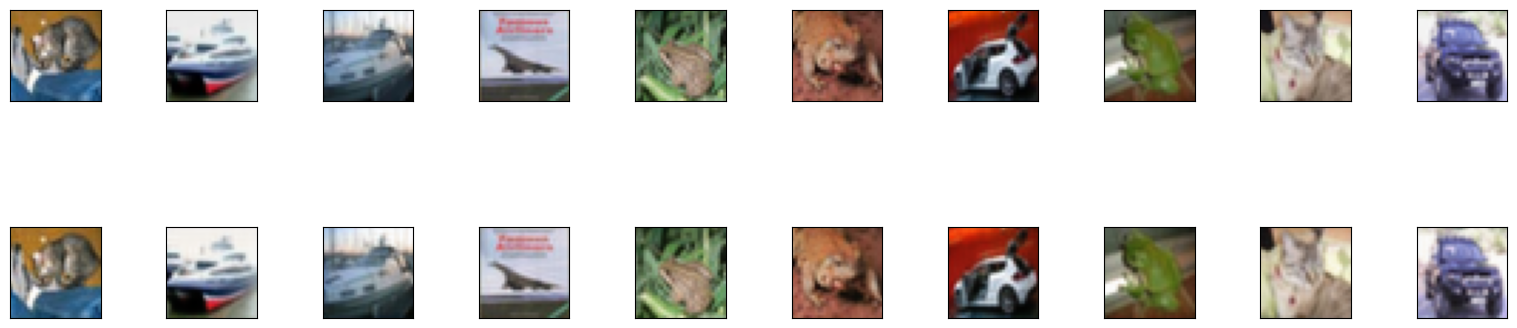

In [ ]:
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.models import Model, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 3)
X_test = X_test.reshape(len(X_test), X_test.shape[1], X_test.shape[2], 3)
print(X_train.shape)
print(X_test.shape)

input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())  # 32x32x32
model.add(Conv2D(16, kernel_size=3, strides=2, padding='same', activation='relu'))  # 16x16x16
model.add(Conv2D(8, kernel_size=3, strides=1, padding='same', activation='relu'))  # 16x16x8
model.add(BatchNormalization())  # 16x16x8
model.add(UpSampling2D())
model.add(Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu'))  # 32x32x16
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=1, strides=1, padding='same', activation='relu'))  # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3, kernel_size=1, strides=1, padding='same', activation='sigmoid'))  # 32x32x3
model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

autoencoder = Model(input_img, decoded)

autoencoder.summary()

encoder = Model(input_img, encoded)

encoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, X_train,
          epochs=50,
          batch_size=256,
          shuffle=True,
          validation_data=(X_test, X_test))

predicted = model.predict(X_test)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstructed images
    ax = plt.subplot(3, 20, 2 * 20 + i + 1)
    plt.imshow(predicted[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


# **Question 4**

**Dataset:** CIFAR-10 dataset comprising 50,000 training images and 10,000 testing images, each sized 32x32 pixels with 3 color channels.

**Sequential Model:** 29,123 parameters, with 28,931 trainable parameters.
"Model_1": 4,963 parameters.
"Model_2": 2,192 parameters.
All models trained for 50 epochs with Mean Squared Error (MSE) loss function utilized.


**Question 1):**

Encoder Numerical Details:(16,8,8)
Decoder Numerical Details:(8,8,16)

**Results (Sequential Model):**

Loss decreased from 0.0065 to 0.00026.

Accuracy increased from 0.6883 to 0.8977.

**Validation (Sequential Model):**

Validation loss decreased from 0.0235 to 0.00036.

Validation accuracy increased from 0.6522 to 0.8739.

**Question 2):**

Encoder Numerical Details:(64,32,16)
Decoder Numerical Details:(16,32,64)

**Results (Sequential Model):**

Loss decreased from 0.0080 to 0.00025.

Accuracy increased from 0.6526 to 0.8960.

**Validation (Sequential Model):**

Validation loss decreased from  0.0373 to 0.00026.

Validation accuracy increased from 0.5226 to 0.8974

**Question 3):**

Encoder Numerical Details:(32,16,8)
Decoder Numerical Details:(8,16,32)

**Results (Sequential Model):**

Loss decreased from 0.0162 to 0.00034.

Accuracy increased from 0.528 to 0.8796

**Validation (Sequential Model):**

Validation loss decreased from  0.0262 to 0.00039.

Validation accuracy increased from 0.5501 to 0.8634

**Observation**

**Error Reduction:**Q2 achieved the lowest validation loss of 0.00026, outperforming Q1 (0.00036) and Q3 (0.00039).

**Accuracy Improvement:**Q2 showed the highest validation accuracy of 0.8974, surpassing Q1 (0.8739) and Q3 (0.8634).

**Model Complexity**:Despite having more parameters (29,123), Q2 performed the best, indicating efficient parameter utilization.

**Balanced Performance**:Q2 maintained consistent performance with minimal overfitting, as indicated by the close alignment of training and validation losses.

**Generalization**:Q2 demonstrated robust generalization, achieving high accuracy on unseen data, with validation accuracy matching or exceeding training accuracy.

In summary, Q2 emerges as the top choice due to its superior performance metrics, efficient parameter usage, and strong generalization capabilities.




# **Question 5**

170498071/170498071 [==============================] - 6s 0us/step


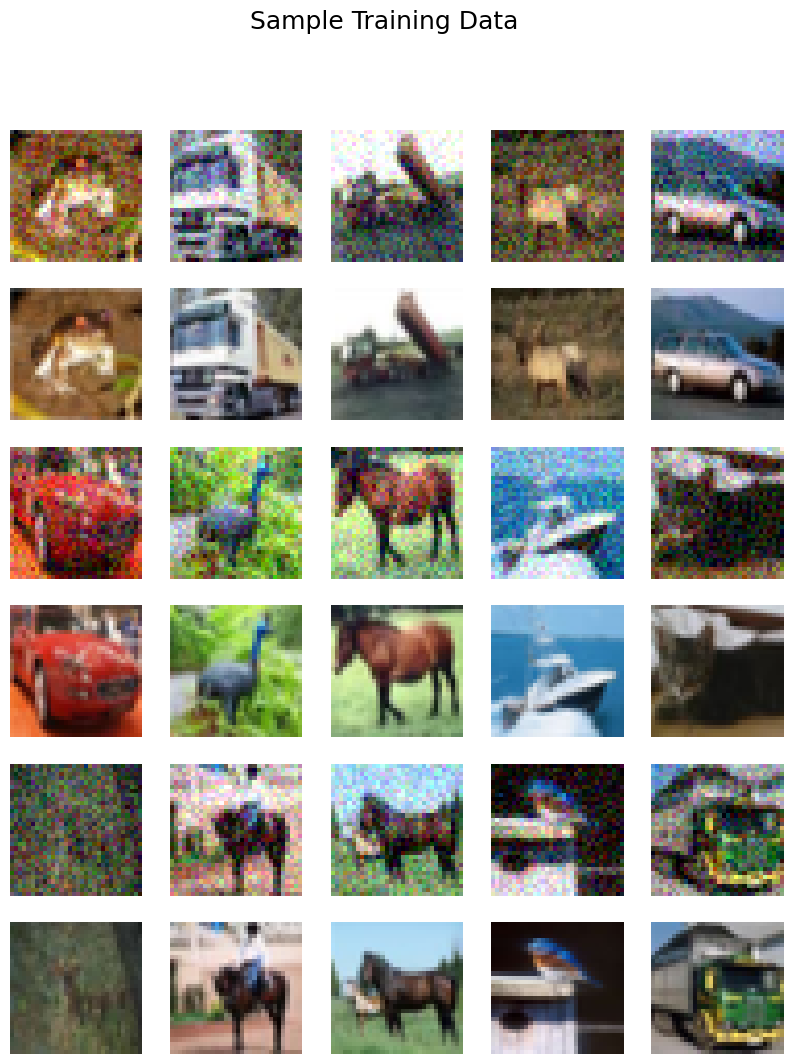

Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 32)           896       ['inputs[0][0]']              
                                                                                                  
 batch_normalization (Batch  (None, 16, 16, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 8, 8, 64)             18496     ['batch_normalizatio

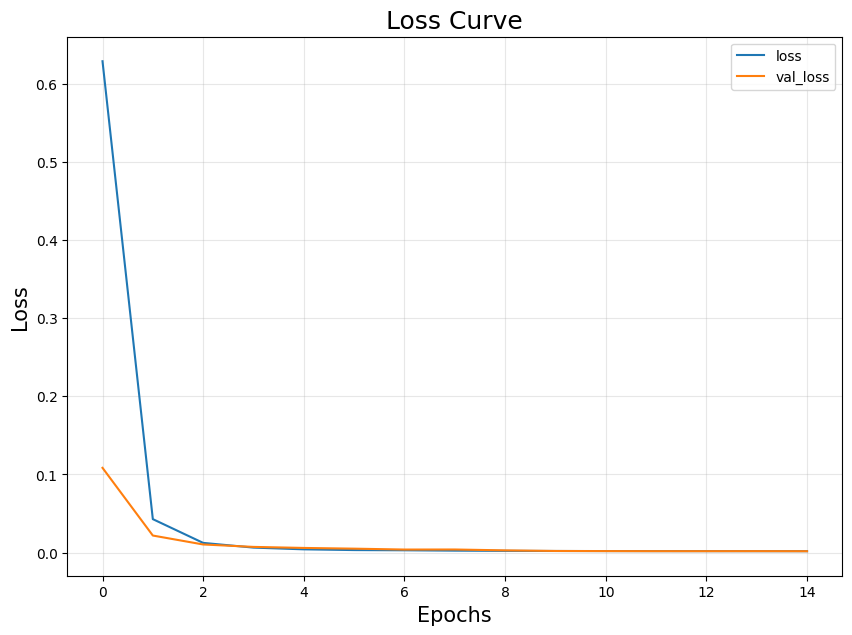

2/2 [==============================] - 1s 11ms/step


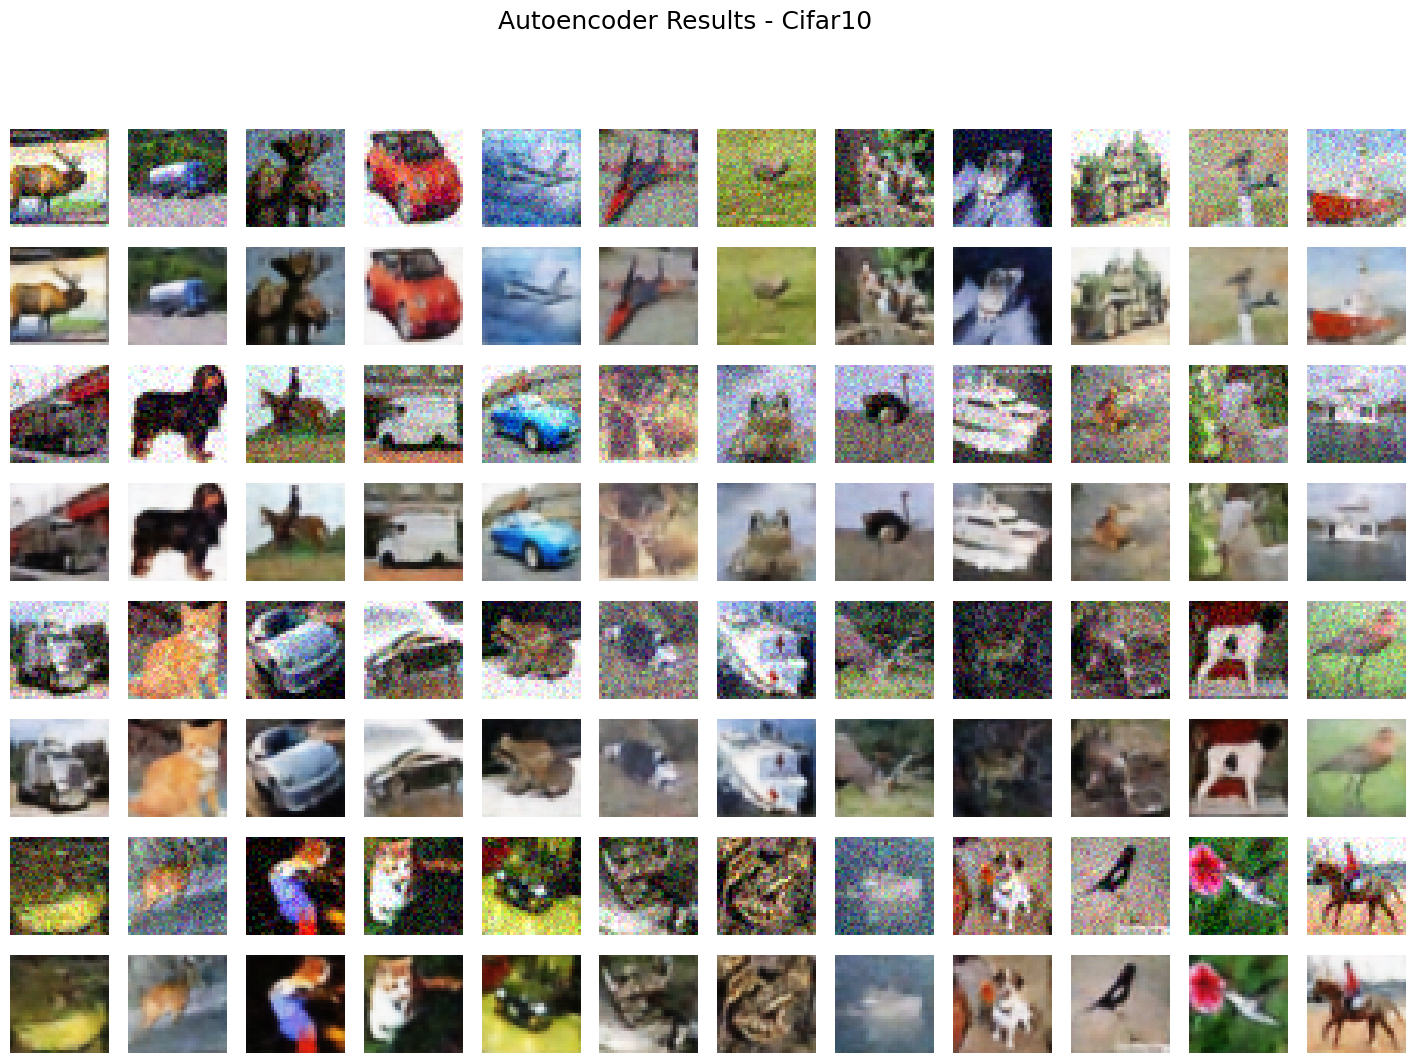

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Conv2DTranspose, Activation, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
import tensorflow as tf

(train_data_clean, _), (test_data_clean, _) = cifar10.load_data()

# scaling input data
train_data_clean = train_data_clean.astype('float32') / 255.
test_data_clean = test_data_clean.astype('float32') / 255.

def add_noise_and_clip_data(data):
    noise = np.random.normal(loc = 0.0, scale = 0.3, size = data.shape)
    data = data + noise * 0.3
    data = np.clip(data, 0., 1.)
    return data
train_data_noisy = add_noise_and_clip_data(train_data_clean)
test_data_noisy = add_noise_and_clip_data(test_data_clean)



rows = 3 # defining no. of rows in figure
cols = 5 # defining no. of colums in figure

f = plt.figure(figsize = (2 * cols, 2 * rows * 2)) # defining a figure

for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows * 2, cols, (2 * i * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(train_data_noisy[i * cols + j])
        plt.axis("off")
    for j in range(cols):
        f.add_subplot(rows * 2, cols, ((2 * i + 1) * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(train_data_clean[i * cols + j])
        plt.axis("off")

f.suptitle("Sample Training Data", fontsize = 18)
plt.savefig("Cifar-trian.png")

plt.show()





def conv_block(x, filters, kernel_size, strides = 2):
    x = Conv2D(filters = filters,
               kernel_size = kernel_size,
               strides = strides,
               padding = 'same',
               activation = 'relu',
               kernel_regularizer = regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    return x


def deconv_block(x, filters, kernel_size):
    x = Conv2DTranspose(filters = filters,
                        kernel_size = kernel_size,
                        strides = 2,
                        padding = 'same',
                        activation = 'relu',
                        kernel_regularizer = regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    return x



def autoencoder():
    inputs = Input(shape = (32, 32, 3), name = 'inputs')
    conv_block1 = conv_block(inputs, 32, 3)
    conv_block2 = conv_block(conv_block1, 64, 3)
    conv_block3 = conv_block(conv_block2, 128, 3)
    conv_block4 = conv_block(conv_block3, 256, 3)
    conv_block5 = conv_block(conv_block4, 256, 3)
    conv_block6 = conv_block(conv_block5, 512, 3, 1)
    deconv_block1 = deconv_block(conv_block6, 512, 3)
    merge1 = Concatenate()([deconv_block1, conv_block4])
    deconv_block2 = deconv_block(merge1, 256, 3)
    merge2 = Concatenate()([deconv_block2, conv_block3])
    deconv_block3 = deconv_block(merge2, 128, 3)
    merge3 = Concatenate()([deconv_block3, conv_block2])
    deconv_block4 = deconv_block(merge3, 64, 3)
    merge4 = Concatenate()([deconv_block4, conv_block1])
    deconv_block5 = deconv_block(merge4, 32, 3)

    final_deconv = Conv2DTranspose(filters = 3, kernel_size = 3, padding = 'same')(deconv_block5)
    outputs = Activation('sigmoid', name = 'output')(final_deconv)
    return Model(inputs, outputs, name = 'autoencoder')




model = autoencoder()

def scheduler(epoch):
    if epoch < 10:
        return 0.0001
    else:
        return 0.0001 * tf.math.exp(0.1 * (10 - epoch))

class myCallback(Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.80):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

lr = LearningRateScheduler(scheduler)
checkpoint = ModelCheckpoint('best_model.h5', verbose = 1, save_best_only = True, save_weights_only = True)

model.compile(optimizer = "adam", loss = 'mse', metrics=["accuracy"])
model.summary()


history = model.fit(train_data_noisy,
                    train_data_clean,
                    validation_data = (test_data_noisy, test_data_clean),
                    epochs = 25,
                    batch_size = 128,
                    shuffle = True,
                    callbacks = [checkpoint, callbacks, lr])




 # Defining Figure
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve_cifar10.png")
plt.show()





# Select few random test images
num_imgs = 48
rand = np.random.randint(1, test_data_noisy.shape[0]-48)

cifar_test_images = test_data_noisy[rand:rand+num_imgs] # slicing
cifar_test_predicted = model.predict(cifar_test_images) # predict

rows = 4 # defining no. of rows in figure
cols = 12 # defining no. of colums in figure
cell_size = 1.5
f = plt.figure(figsize=(cell_size*cols,cell_size*rows*2)) # defining a figure
f.tight_layout()
for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows * 2, cols, (2 * i * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(cifar_test_images[i * cols + j])
        plt.axis("off")

    for j in range(cols):
        f.add_subplot(rows * 2, cols, ((2 * i+ 1) * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(cifar_test_predicted[i * cols + j])
        plt.axis("off")

f.suptitle("Autoencoder Results - Cifar10",fontsize=18)
plt.savefig("test_results_cifar10.png")

plt.show()



# **Question 6(0.5)**

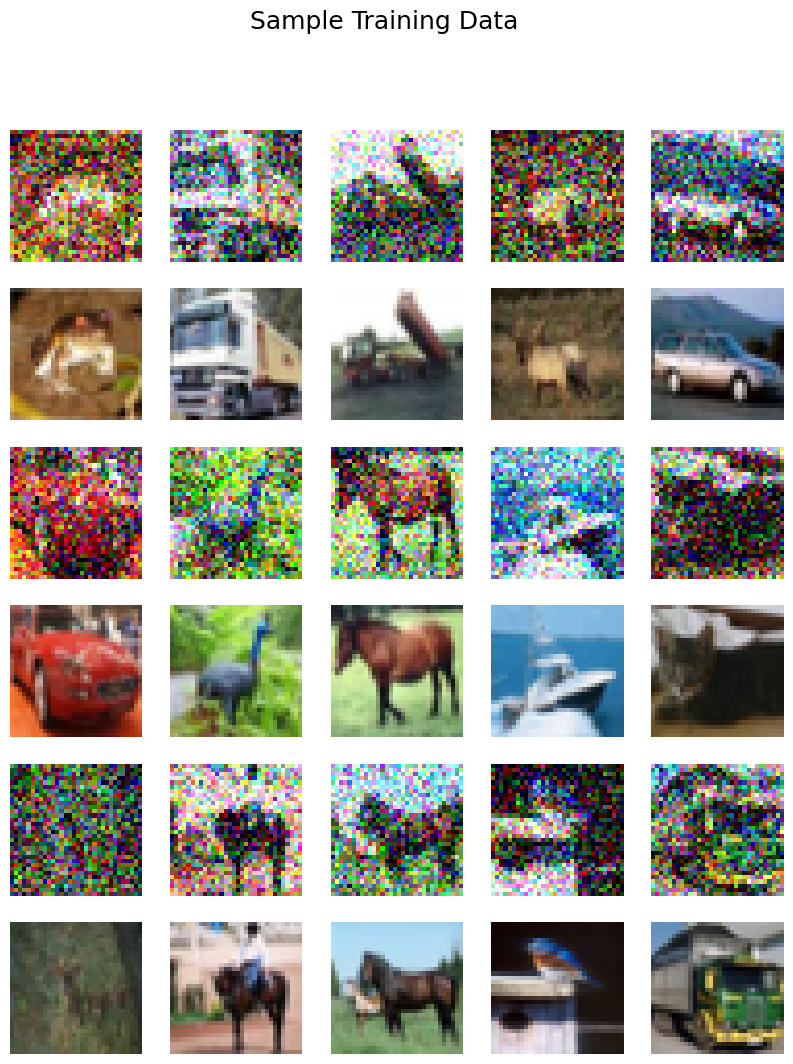

Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 16, 16, 32)           896       ['inputs[0][0]']              
                                                                                                  
 batch_normalization_11 (Ba  (None, 16, 16, 32)           128       ['conv2d_6[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 conv2d_7 (Conv2D)           (None, 8, 8, 64)             18496     ['batch_normalizatio

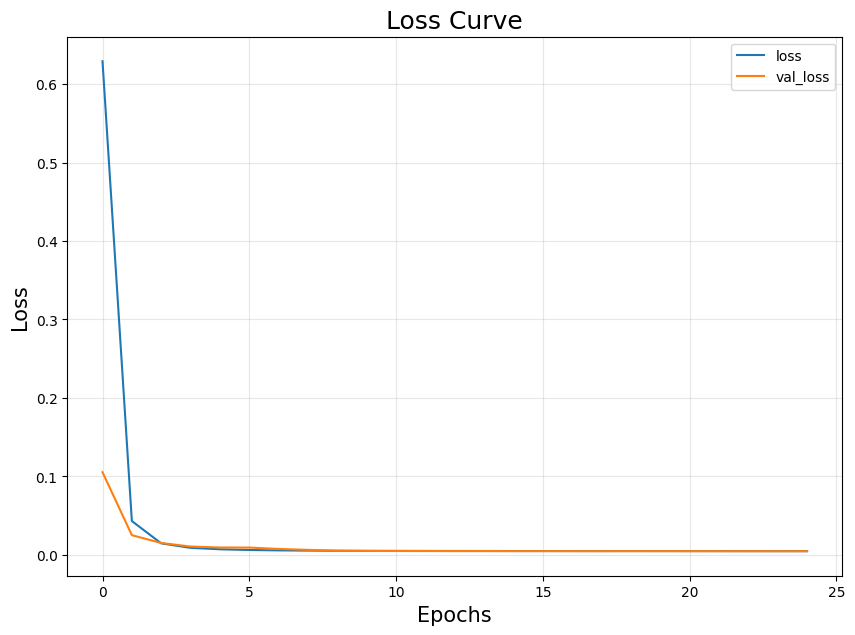

2/2 [==============================] - 0s 15ms/step


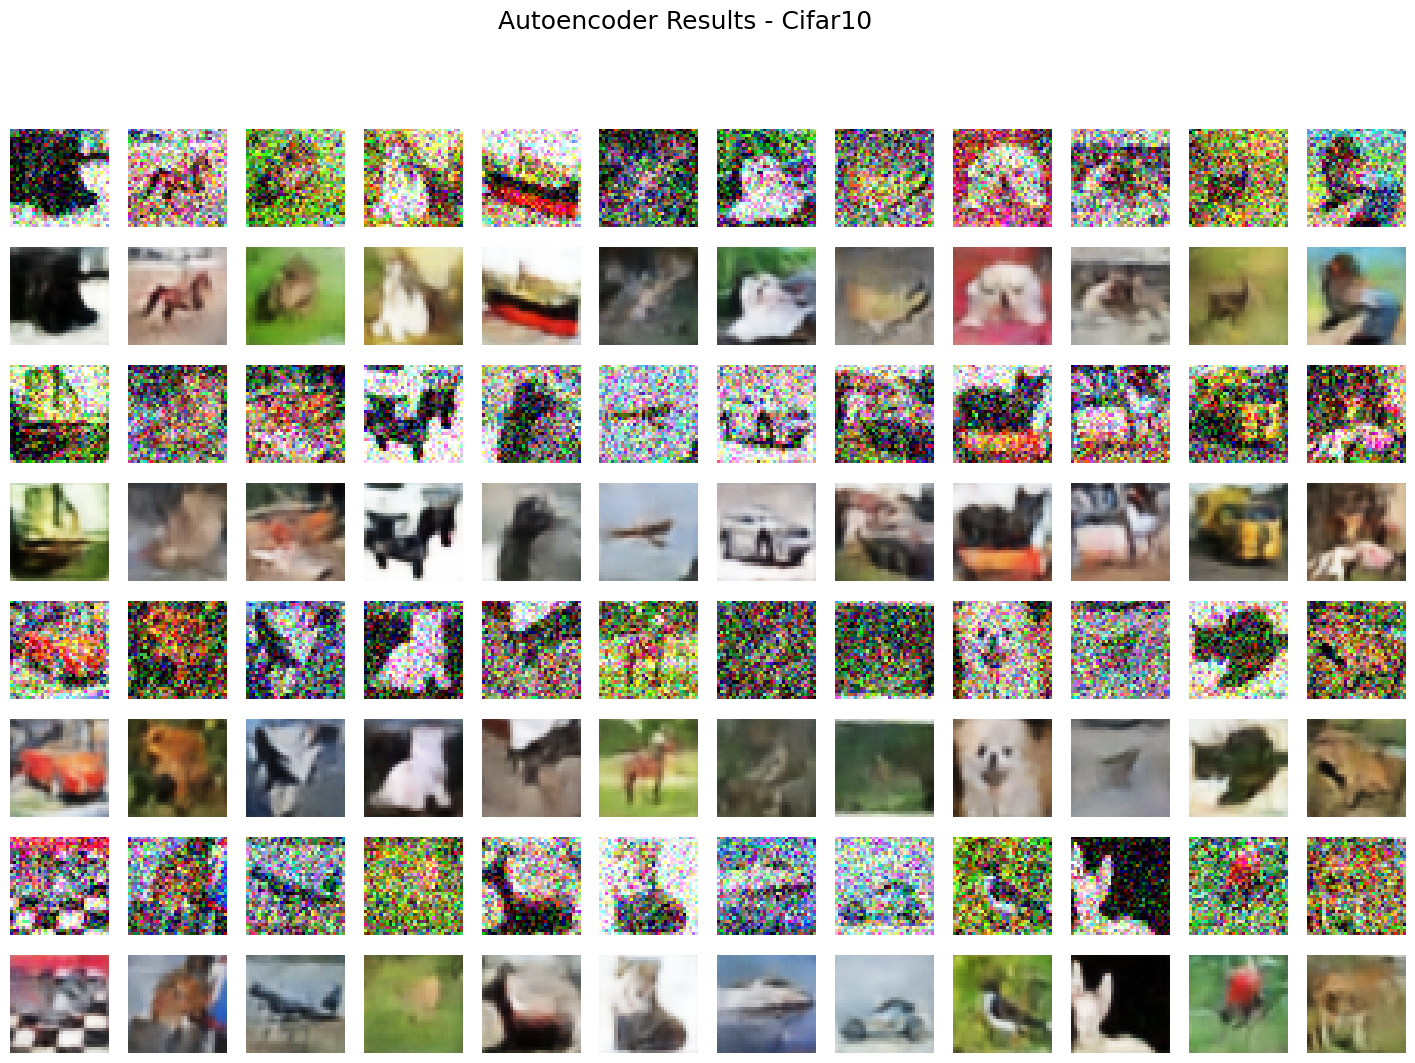

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Conv2DTranspose, Activation, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
import tensorflow as tf

(train_data_clean, _), (test_data_clean, _) = cifar10.load_data()

# scaling input data
train_data_clean = train_data_clean.astype('float32') / 255.
test_data_clean = test_data_clean.astype('float32') / 255.




def add_noise_and_clip_data(data, scale=0.3):
    noise = np.random.normal(loc=0.0, scale=scale, size=data.shape)
    data = data + noise * scale
    data = np.clip(data, 0., 1.)
    return data

# Change the scale parameter to your choice
train_data_noisy = add_noise_and_clip_data(train_data_clean, scale=0.5)
test_data_noisy = add_noise_and_clip_data(test_data_clean, scale=0.5)




rows = 3 # defining no. of rows in figure
cols = 5 # defining no. of colums in figure

f = plt.figure(figsize = (2 * cols, 2 * rows * 2)) # defining a figure

for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows * 2, cols, (2 * i * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(train_data_noisy[i * cols + j])
        plt.axis("off")
    for j in range(cols):
        f.add_subplot(rows * 2, cols, ((2 * i + 1) * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(train_data_clean[i * cols + j])
        plt.axis("off")

f.suptitle("Sample Training Data", fontsize = 18)
plt.savefig("Cifar-trian.png")

plt.show()


def conv_block(x, filters, kernel_size, strides = 2):
    x = Conv2D(filters = filters,
               kernel_size = kernel_size,
               strides = strides,
               padding = 'same',
               activation = 'relu',
               kernel_regularizer = regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    return x


def deconv_block(x, filters, kernel_size):
    x = Conv2DTranspose(filters = filters,
                        kernel_size = kernel_size,
                        strides = 2,
                        padding = 'same',
                        activation = 'relu',
                        kernel_regularizer = regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    return x



def autoencoder():
    inputs = Input(shape = (32, 32, 3), name = 'inputs')
    conv_block1 = conv_block(inputs, 32, 3)
    conv_block2 = conv_block(conv_block1, 64, 3)
    conv_block3 = conv_block(conv_block2, 128, 3)
    conv_block4 = conv_block(conv_block3, 256, 3)
    conv_block5 = conv_block(conv_block4, 256, 3)
    conv_block6 = conv_block(conv_block5, 512, 3, 1)
    deconv_block1 = deconv_block(conv_block6, 512, 3)
    merge1 = Concatenate()([deconv_block1, conv_block4])
    deconv_block2 = deconv_block(merge1, 256, 3)
    merge2 = Concatenate()([deconv_block2, conv_block3])
    deconv_block3 = deconv_block(merge2, 128, 3)
    merge3 = Concatenate()([deconv_block3, conv_block2])
    deconv_block4 = deconv_block(merge3, 64, 3)
    merge4 = Concatenate()([deconv_block4, conv_block1])
    deconv_block5 = deconv_block(merge4, 32, 3)

    final_deconv = Conv2DTranspose(filters = 3, kernel_size = 3, padding = 'same')(deconv_block5)
    outputs = Activation('sigmoid', name = 'output')(final_deconv)
    return Model(inputs, outputs, name = 'autoencoder')




model = autoencoder()

def scheduler(epoch):
    if epoch < 10:
        return 0.0001
    else:
        return 0.0001 * tf.math.exp(0.1 * (10 - epoch))

class myCallback(Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.80):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

lr = LearningRateScheduler(scheduler)
checkpoint = ModelCheckpoint('best_model.h5', verbose = 1, save_best_only = True, save_weights_only = True)

model.compile(optimizer = "adam", loss = 'mse', metrics=["accuracy"])
model.summary()


history = model.fit(train_data_noisy,
                    train_data_clean,
                    validation_data = (test_data_noisy, test_data_clean),
                    epochs = 25,
                    batch_size = 128,
                    shuffle = True,
                    callbacks = [checkpoint, callbacks, lr])




 # Defining Figure
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve_cifar10.png")
plt.show()





# Select few random test images
num_imgs = 48
rand = np.random.randint(1, test_data_noisy.shape[0]-48)

cifar_test_images = test_data_noisy[rand:rand+num_imgs] # slicing
cifar_test_predicted = model.predict(cifar_test_images) # predict

rows = 4 # defining no. of rows in figure
cols = 12 # defining no. of colums in figure
cell_size = 1.5
f = plt.figure(figsize=(cell_size*cols,cell_size*rows*2)) # defining a figure
f.tight_layout()
for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows * 2, cols, (2 * i * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(cifar_test_images[i * cols + j])
        plt.axis("off")

    for j in range(cols):
        f.add_subplot(rows * 2, cols, ((2 * i+ 1) * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(cifar_test_predicted[i * cols + j])
        plt.axis("off")

f.suptitle("Autoencoder Results - Cifar10",fontsize=18)
plt.savefig("test_results_cifar10.png")

plt.show()

